# MobileNet이 왜 필요한가?

## 고성능의 환경
데이터 센터 환경에서는 고성능의 CPU가 매우 많이 있기 때문에 연산 처리 성능이 매우 고성능이고, 고성능의 그래픽 카드(GPU) 다수를 가지고 있을 수 있으며, 메모리도 대용량을 사용할 수 있습니다. 또한 전력 공급이 지속적으로 이루어지기 때문에 전원을 아끼기 위해 성능을 낮추는 것 보다는 더 높은 퍼포먼스에 초점을 두는 경우가 많습니다.

이런 컴퓨터 환경에서는 어떤 모델을 넣더라도 잘 작동을 할 것입니다.

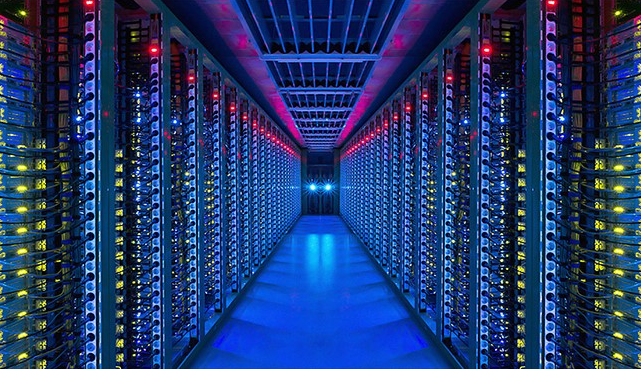

## 고성능이 아닌 환경
실생활에서 사용하는 AI 서비스들은 데이터 센터 또는 슈퍼 컴퓨터보다는 자동차, 드론, 스마트폰과 같은 환경에서 잘 작동이 되어야 하는 경우가 많아지고 있습니다.    

이런 저성능의 환경에서 잘 작동할 수 있으며, 성능도 보장이되어야 하는 요구들이 늘어나면서 `딥러닝 모델 경량화(MobileNet)` 알고리즘이 발전하게 되었습니다.

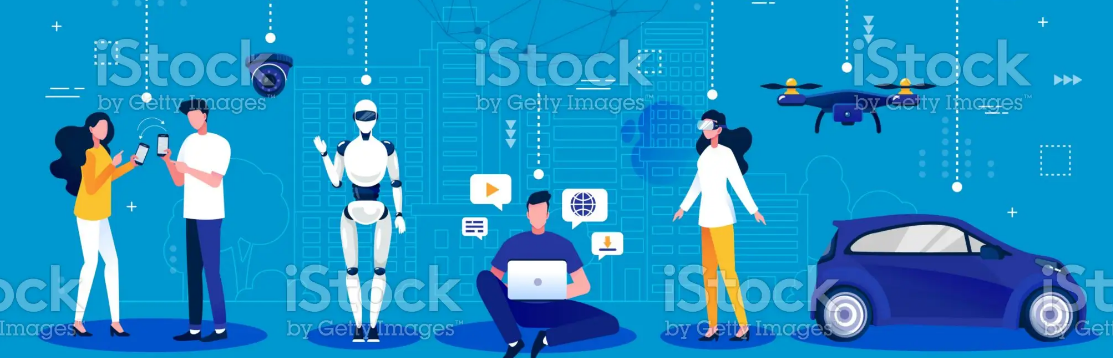

# [MobileNet](https://wikidocs.net/164799)

## Standard Convolution 연산량

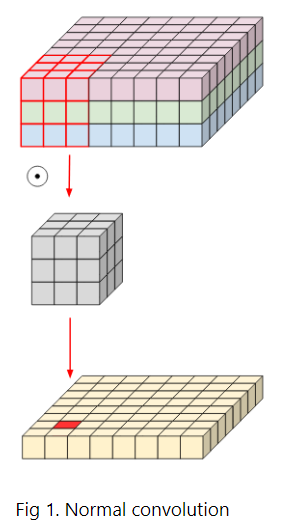

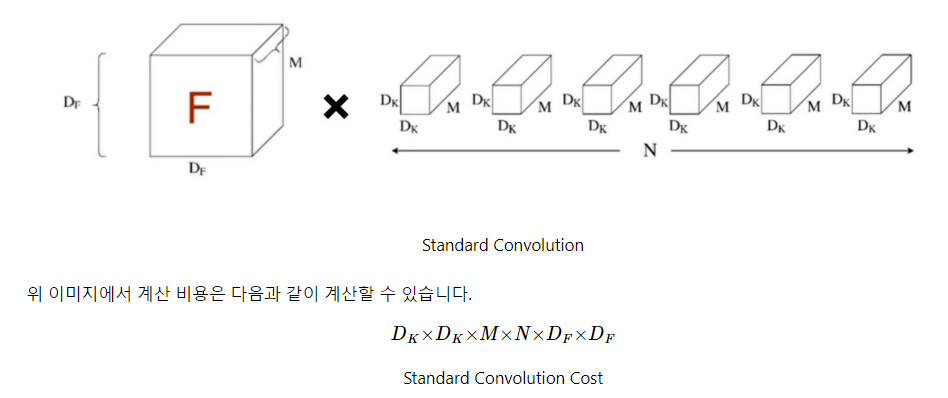

## Depth-wise Separable Convolution 연산량

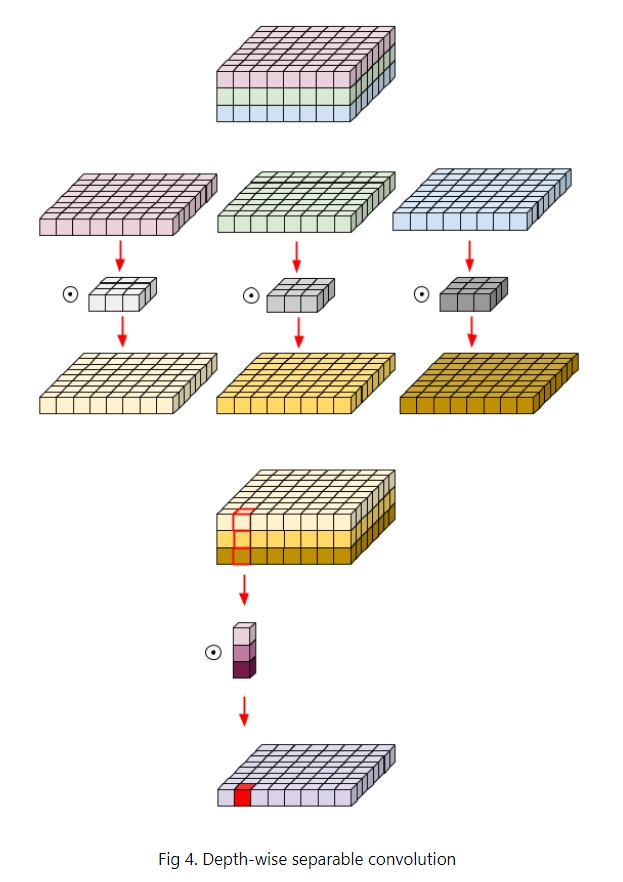

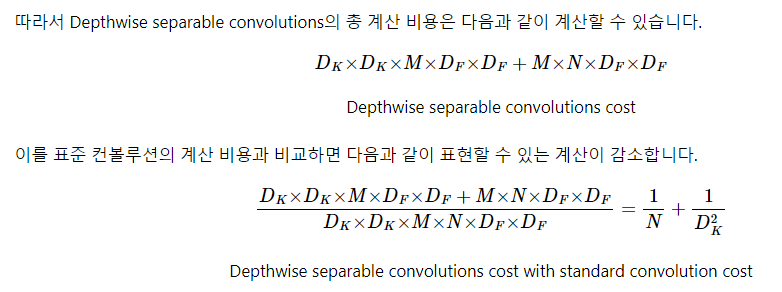

### Depthwise Convolution 연산량

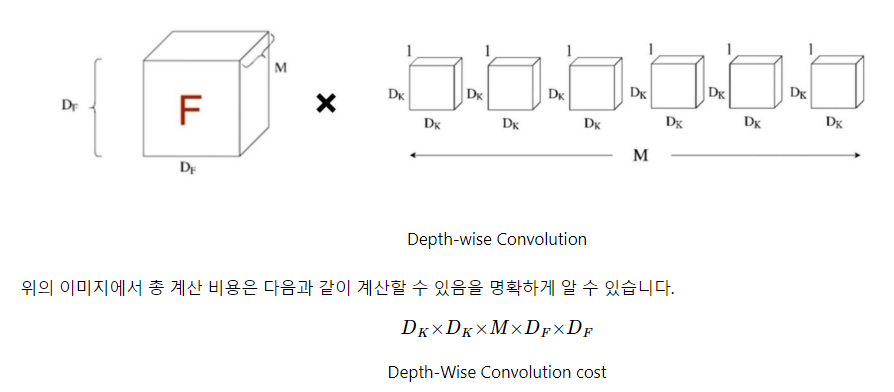

### Pointwise Convolution 연산량

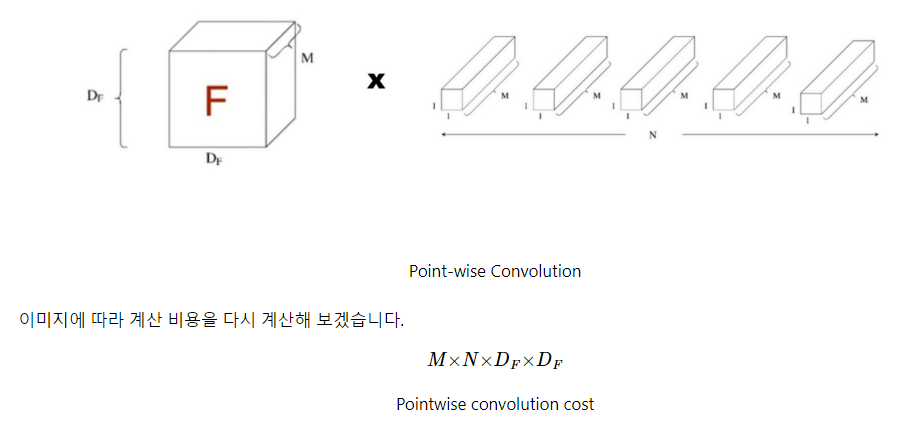

## MobileNet Model Block
MobileNet 모델의 key idea는 Depth-wise Separable Convolution을 통해 연산량을 줄였습니다.    
따라서 다른 기존 모델보다 layers는 많지만 전체 연산량을 획기적으로 줄임으로써 고성능이 아닌 환경에서도 작동할 수 있는 알고리즘입니다. 

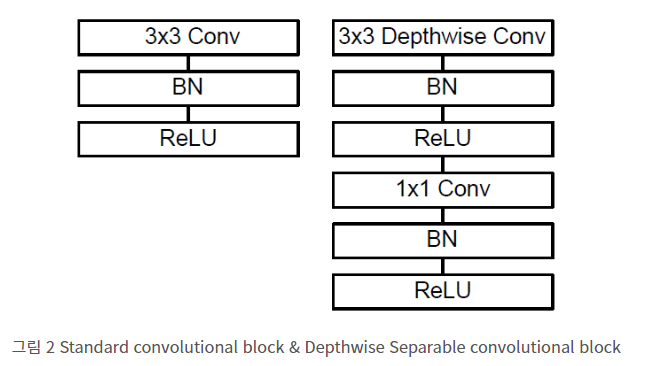

## MobileNet과 다른 알고리즘과 효율 비교

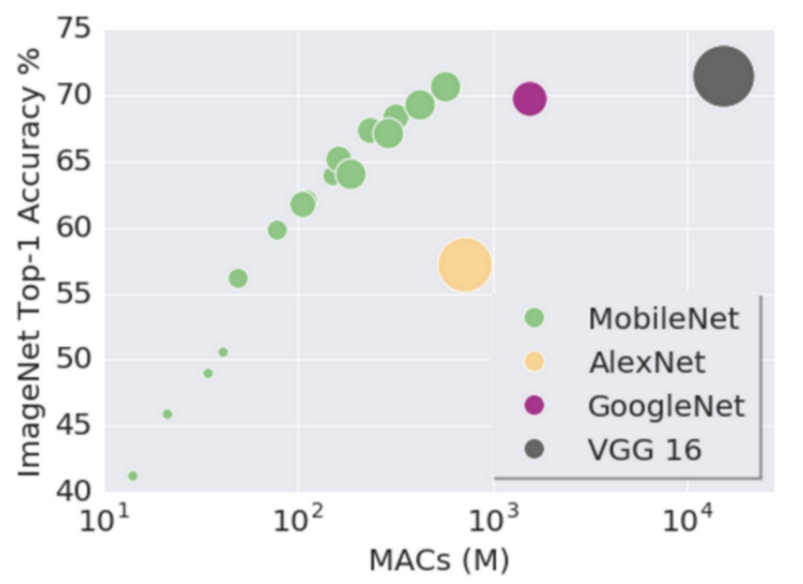

# [Pretrained Model](https://pytorch.org/hub/pytorch_vision_mobilenet_v2/)

In [ ]:
import torch

model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [ ]:
# Download an example image from the pytorch website
import urllib

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")

try: 
  urllib.URLopener().retrieve(url, filename)
except: 
  urllib.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

In [ ]:
input_image = Image.open(filename)
input_image

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
input_batch.shape

torch.Size([1, 3, 224, 224])

In [ ]:
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 2.0977e+00, -1.7348e+00, -2.2355e+00, -2.9669e+00, -2.3805e+00,
         9.7397e-01, -1.6049e+00,  3.6914e+00,  6.3812e+00, -1.2929e+00,
        -6.7555e+00, -3.3525e+00, -7.9619e+00, -4.4554e+00, -5.6423e+00,
        -4.6624e+00, -1.9577e+00, -3.5811e-01, -1.2812e+00, -4.6707e+00,
        -3.2935e+00, -2.5674e+00, -2.4351e+00, -1.3017e+00, -3.2453e+00,
        -1.4237e+00, -1.2001e+00,  4.1275e-01, -1.6093e+00,  1.5871e+00,
         2.7725e-01, -6.2651e-01, -2.9734e-01, -3.8219e+00, -1.5450e+00,
        -2.8976e+00, -5.6528e-01, -2.3938e+00, -3.3705e-01,  1.2809e+00,
        -1.2516e+00, -2.6469e+00, -3.1011e+00, -2.2447e+00, -4.4385e-01,
        -1.2620e+00,  8.2895e-01, -2.0436e+00, -6.6037e-01, -8.6521e-02,
         4.8967e-01, -1.7190e+00, -7.7943e-01, -1.1046e+00, -5.3857e-01,
        -2.9254e+00, -1.9327e+00, -2.7273e+00, -6.0903e-01, -1.6802e+00,
         1.3443e+00, -4.2062e+00, -1.4768e+00, -4.5581e+00, -3.2726e+00,
        -4.0086e+00,  1.5702e-01, -1.9921e+00, -7.4

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-03-31 07:37:17--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-03-31 07:37:17 (98.5 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

print(f'len: {len(categories)}')
categories[:5]

len: 1000


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

In [ ]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item(), sep='\t\t')

Samoyed		0.8303039073944092
Pomeranian		0.06988810002803802
keeshond		0.012964135967195034
collie		0.010797751136124134
Great Pyrenees		0.009886731393635273


# Transfer Learning

## Load Data

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
import sys 

sys.path.append("/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/")

In [ ]:
from service import data_setup, engine

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [ ]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
# Setup Dirs
default_path = '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/data/pizza_steak_sushi/'
train_dir = default_path+ "train"
test_dir = default_path+ "test"

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=preprocess, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f4ba6479040>,
 ['pizza', 'steak', 'sushi'])

## Load Pretrained Model

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

### requires_grad = False

In [ ]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

### classifier layer 변경

In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

### summary

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model, 
        input_size=(32, 3, 256, 256), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
MobileNetV2 (MobileNetV2)                     [32, 3, 256, 256]    [32, 3]              --                   Partial
├─Sequential (features)                       [32, 3, 256, 256]    [32, 1280, 8, 8]     --                   False
│    └─ConvBNActivation (0)                   [32, 3, 256, 256]    [32, 32, 128, 128]   --                   False
│    │    └─Conv2d (0)                        [32, 3, 256, 256]    [32, 32, 128, 128]   (864)                False
│    │    └─BatchNorm2d (1)                   [32, 32, 128, 128]   [32, 32, 128, 128]   (64)                 False
│    │    └─ReLU6 (2)                         [32, 32, 128, 128]   [32, 32, 128, 128]   --                   --
│    └─InvertedResidual (1)                   [32, 32, 128, 128]   [32, 16, 128, 128]   --                   False
│    │    └─Sequential (conv)                 [32, 32, 128, 128]   [32, 16, 1

## Training

In [ ]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0560 | train_acc: 0.4688 | test_loss: 0.9726 | test_acc: 0.4328
Epoch: 2 | train_loss: 0.9304 | train_acc: 0.5469 | test_loss: 0.6640 | test_acc: 0.8248
Epoch: 3 | train_loss: 0.7753 | train_acc: 0.7188 | test_loss: 0.6666 | test_acc: 0.7424
Epoch: 4 | train_loss: 0.7400 | train_acc: 0.6523 | test_loss: 0.5875 | test_acc: 0.7519
Epoch: 5 | train_loss: 0.5787 | train_acc: 0.8164 | test_loss: 0.4880 | test_acc: 0.8551
[INFO] Total training time: 174.409 seconds


## Evaluation

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

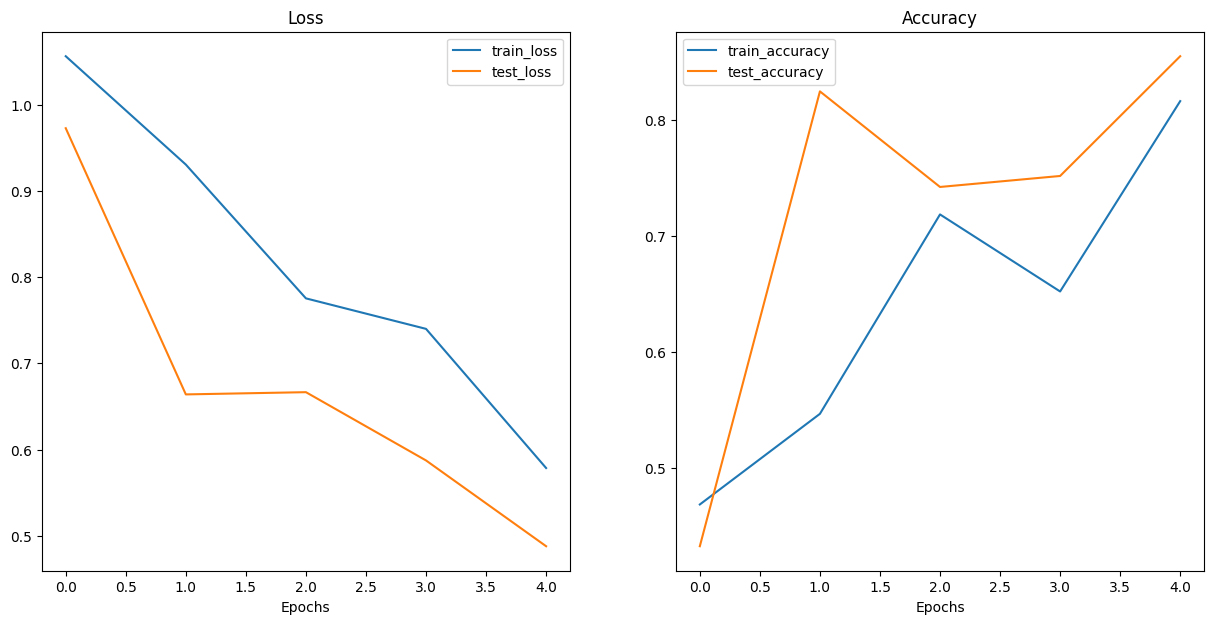

In [ ]:
# Plot the loss curves of our model
plot_loss_curves(results)